In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [22]:
dataset = read_csv('../datasets/fashion-mnist-test.csv')
dataset = dataset.values

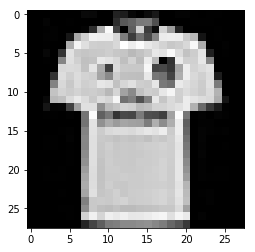

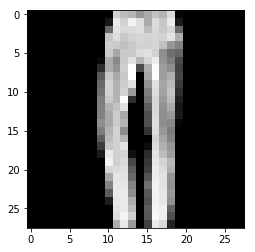

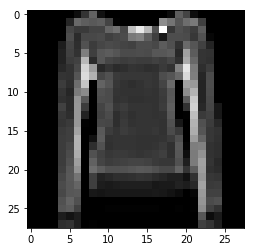

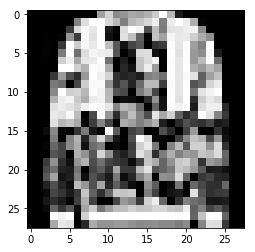

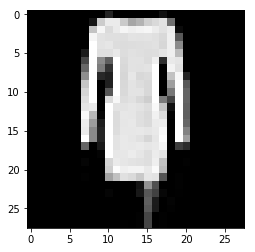

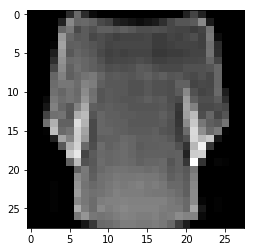

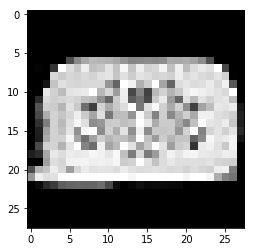

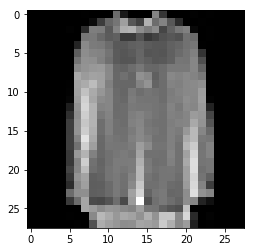

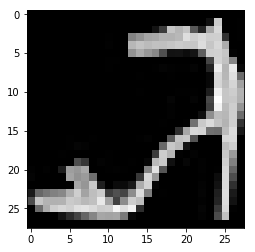

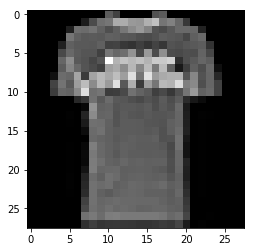

In [23]:
for i in range(10):
    plt.figure()
    plt.imshow(dataset[i,1:].reshape(28,28), cmap='gray')

In [24]:
X, y = dataset[:, 1:]/255, dataset[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [26]:
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

In [27]:
y_train.shape, y_test.shape

((8000, 10), (2000, 10))

In [28]:
model = Sequential()

model.add(Dense(256, input_shape=(784,)))
model.add(Activation('sigmoid'))

model.add(Dense(64))
model.add(Activation('tanh'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Initialize Weights
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [37]:
hist = model.fit(X_train, y_train,
          shuffle=True,
          epochs=40,
          batch_size=128,
          validation_data=(X_test, y_test)
         )

Train on 8000 samples, validate on 2000 samples
Epoch 1/40
8000/8000 [==============================] - 0s 32us/step - loss: 0.5723 - acc: 0.8047 - val_loss: 0.5838 - val_acc: 0.7885
Epoch 2/40
8000/8000 [==============================] - 0s 32us/step - loss: 0.5700 - acc: 0.8034 - val_loss: 0.5779 - val_acc: 0.7925
Epoch 3/40
8000/8000 [==============================] - 0s 30us/step - loss: 0.5672 - acc: 0.8055 - val_loss: 0.5796 - val_acc: 0.7900
Epoch 4/40
8000/8000 [==============================] - 0s 35us/step - loss: 0.5646 - acc: 0.8069 - val_loss: 0.5748 - val_acc: 0.7970
Epoch 5/40
8000/8000 [==============================] - 0s 31us/step - loss: 0.5619 - acc: 0.8065 - val_loss: 0.5741 - val_acc: 0.7910
Epoch 6/40
8000/8000 [==============================] - 0s 32us/step - loss: 0.5597 - acc: 0.8104 - val_loss: 0.5681 - val_acc: 0.7965
Epoch 7/40
8000/8000 [==============================] - 0s 31us/step - loss: 0.5569 - acc: 0.8105 - val_loss: 0.5720 - val_acc: 0.7900
Epoch 8

In [38]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

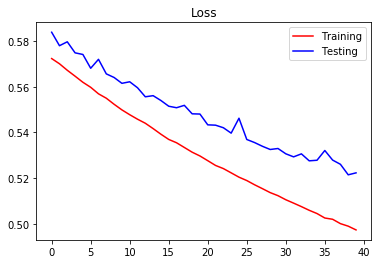

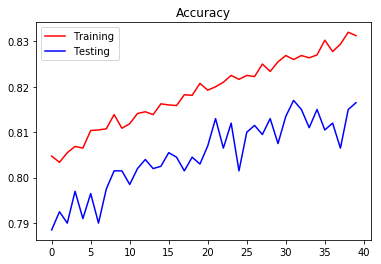

In [39]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Testing')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Testing')
plt.legend()
plt.show()